In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
style.use('Solarize_Light2')

In [2]:
data = {
    'version': ['1996 JP', '2005 TW', '2010 KR', '2013 JP', '2015 TH'],
    'rating': [6.4, 8.2, 7.4, 8.1, 8.4],
    'rate user': [1641, 7938, 26337, 11644, 3734],
    'watcher': [2857, 12332, 37270, 18927, 7439]
}

version = pd.DataFrame(data=data)
version

,rate user,rating,version,watcher
0,1641,6.4,1996 JP,2857
1,7938,8.2,2005 TW,12332
2,26337,7.4,2010 KR,37270
3,11644,8.1,2013 JP,18927
4,3734,8.4,2015 TH,7439


In [3]:
version['feedback rate(%)'] = round(version['rate user'] / version['watcher'], 3) * 100
version['just watch'] = version['watcher'] - version['rate user']
version_plot = version.set_index('version')
version_plot

,rate user,rating,watcher,feedback rate(%),just watch
version,,,,,
1996 JP,1641,6.4,2857,57.4,1216
2005 TW,7938,8.2,12332,64.4,4394
2010 KR,26337,7.4,37270,70.7,10933
2013 JP,11644,8.1,18927,61.5,7283
2015 TH,3734,8.4,7439,50.2,3705


Rectangle(xy=(0, -0.25), width=6.4, height=0.5, angle=0)
Rectangle(xy=(0, 0.75), width=8.2, height=0.5, angle=0)
Rectangle(xy=(0, 1.75), width=7.4, height=0.5, angle=0)
Rectangle(xy=(0, 2.75), width=8.1, height=0.5, angle=0)
Rectangle(xy=(0, 3.75), width=8.4, height=0.5, angle=0)


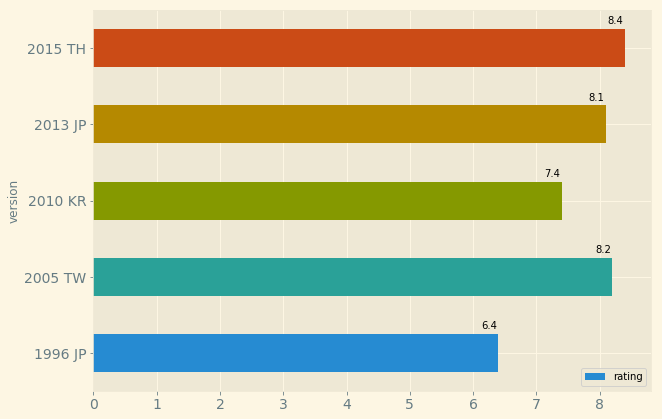

In [15]:
version_output = version_plot.plot(kind='barh', y='rating', fontsize=14, figsize=(10, 7))
for p in version_output.patches:
    print(p)
    version_output.annotate(p.get_width(),
                            (p.get_x() + p.get_width() - 0.27, p.get_y() + p.get_height() + 0.07))

fig = version_output.get_figure()
fig.savefig("../../images/version_rate.png")

Rectangle(xy=(1641, -0.25), width=1216, height=0.5, angle=0)
Rectangle(xy=(7938, 0.75), width=4394, height=0.5, angle=0)
Rectangle(xy=(26337, 1.75), width=10933, height=0.5, angle=0)
Rectangle(xy=(11644, 2.75), width=7283, height=0.5, angle=0)
Rectangle(xy=(3734, 3.75), width=3705, height=0.5, angle=0)


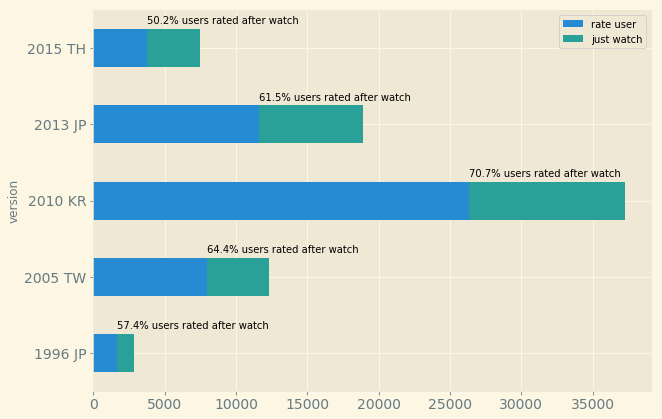

In [4]:
version_feedback = version_plot[['rate user', 'just watch']].plot(kind='barh', 
                                                                  stacked=True, 
                                                                  fontsize=14,
                                                                  figsize=(10, 7))
for i in range(len(version_feedback.patches)):
    if i > 4:
        b = version_feedback.patches[i]
        print(b)
        version_feedback.annotate(str(version_plot['feedback rate(%)'][i-5]) + '% users rated after watch', 
                                  (b.get_x(), b.get_y() + b.get_height() + 0.07))
        
fig = version_feedback.get_figure()
fig.savefig("../../images/feedback_rate.png")

In [54]:
korea_v = pd.read_csv('review.csv')
korea_v.head()

,name,vote,overall,story,cast,music,rewatch
0,Jeaniessi,116,3.0,3.0,8.0,7.0,3.0
1,JohnGilbert,37,10.0,9.0,10.0,10.0,10.0
2,Rourou,33,8.0,8.0,8.0,8.0,7.0
3,bubblefaerie,14,8.0,8.0,8.5,4.5,3.5
4,SeRose,24,7.0,6.0,7.0,6.0,7.0


In [23]:
korea_r =korea_v.drop(columns=['name'])
korea_r.head()

,vote,overall,story,cast,music,rewatch
0,116,3.0,3.0,8.0,7.0,3.0
1,37,10.0,9.0,10.0,10.0,10.0
2,33,8.0,8.0,8.0,8.0,7.0
3,14,8.0,8.0,8.5,4.5,3.5
4,24,7.0,6.0,7.0,6.0,7.0


In [24]:
korea_review_mean = korea_r.mean()
korea_review_mean

vote       6.680851
overall    6.702128
story      6.547872
cast       7.101064
music      7.207447
rewatch    5.898936
dtype: float64

In [25]:
korea_vote_mean = korea_r.loc[korea_r['vote'] > 0].mean()
korea_vote_mean

vote       8.051282
overall    6.679487
story      6.493590
cast       7.185897
music      7.211538
rewatch    5.858974
dtype: float64

In [26]:
korea_max = korea_r.max()
korea_max

vote       116.0
overall     10.0
story       10.0
cast        10.0
music       10.0
rewatch     10.0
dtype: float64

In [27]:
korea_min = korea_r.min()

In [28]:
korea_max_vote_rate = korea_r.loc[korea_r['vote'] == korea_r['vote'].max()].T
korea_max_vote_rate

,0
vote,116.0
overall,3.0
story,3.0
cast,8.0
music,7.0
rewatch,3.0


In [29]:
output_data = pd.concat([korea_review_mean, korea_vote_mean], axis=1, keys=['avg_rating', 'avg_rating_with_vote'])
output_data

,avg_rating,avg_rating_with_vote
vote,6.680851,8.051282
overall,6.702128,6.679487
story,6.547872,6.493590
cast,7.101064,7.185897
music,7.207447,7.211538
rewatch,5.898936,5.858974


In [31]:
output_df = output_data.join(korea_max_vote_rate)
output_v = output_df.drop(['vote'])
output_v.columns = ['Average Rating', 'Average Rating Get Vote From Other User', 'Rating Get Most Vote']
output_v

,Average Rating,Average Rating Get Vote From Other User,Rating Get Most Vote
overall,6.702128,6.679487,3.0
story,6.547872,6.493590,3.0
cast,7.101064,7.185897,8.0
music,7.207447,7.211538,7.0
rewatch,5.898936,5.858974,3.0


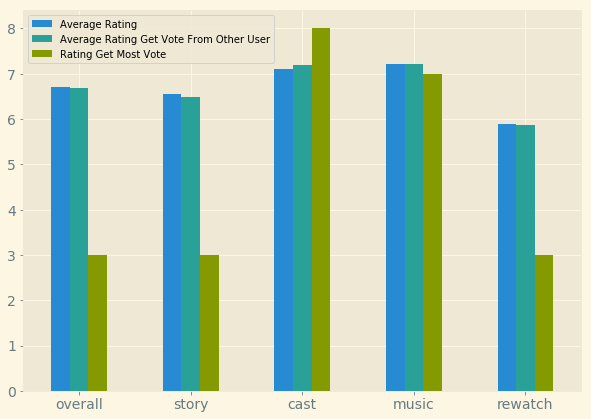

In [47]:
output_graph = output_v.plot(kind='bar', figsize=(10, 7), rot=0, fontsize=14)
fig = output_graph.get_figure()
fig.savefig("../../images/average_rating.png")